**READING THE DATASET**

In [96]:
# LOAD THE LIBRARIES
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [97]:
train = pd.read_csv('./ReNew_Participants_Data/train.csv')
test = pd.read_csv('./ReNew_Participants_Data/test.csv')

print("The Wind Turbine training dataset has", train.shape[0], "records, each with",train.shape[1],"attributes.")
train.head()

The Wind Turbine training dataset has 909604 records, each with 16 attributes.


,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [98]:
print("The Wind Turbine test dataset has", test.shape[0], "records, each with",test.shape[1],"attributes.")
test.head()

The Wind Turbine test dataset has 303202 records, each with 14 attributes.


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465,Turbine_158


In [99]:
# We will change the Timestamp columns
train['timestamp'] = pd.to_datetime(train['timestamp'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   timestamp                               909604 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    909604 non-null  float64       
 2   active_power_raw                        909604 non-null  float64       
 3   ambient_temperature                     909604 non-null  float64       
 4   generator_speed                         909604 non-null  float64       
 5   generator_winding_temp_max              909604 non-null  float64       
 6   grid_power10min_average                 909604 non-null  float64       
 7   nc1_inside_temp                         909604 non-null  float64       
 8   nacelle_temp                            909604 non-null  float64       
 9   reactice_power_calculated_by_converte

In [100]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


In [101]:
train.drop(['timestamp', 'turbine_id'],axis=1,inplace=True)
test.drop(['turbine_id'], axis=1, inplace=True)

In [102]:
train.shape

(909604, 14)

In [103]:
test.shape

(303202, 13)

**Understanding and exploring the columns and dataset better**


In [21]:
DataProfile = ProfileReport(train, title = "Wind Turbine Data Profile Report", explorative=True, minimal=True)
DataProfile.to_file(output_file="DataProfile.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [68]:
train.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,199.487161,5.894950,0.651916,46.328595
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,104.617261,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,98.916060,4.400753,0.432129,44.816740
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,232.821159,5.637207,0.583863,46.302899
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,287.667503,7.092771,0.798240,47.733105
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,359.455531,19.795001,9.534769,65.037689


In [104]:
# Check for null
train.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

In [105]:
test.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
dtype: int64

There are no NULL values to deal with.

In [106]:
train.skew(axis=0)

active_power_calculated_by_converter      1.094894
active_power_raw                          1.079560
ambient_temperature                      -0.405606
generator_speed                          -0.432870
generator_winding_temp_max                0.482791
grid_power10min_average                   1.008062
nc1_inside_temp                           0.040530
nacelle_temp                             -0.427542
reactice_power_calculated_by_converter    1.731298
reactive_power                            1.638332
wind_direction_raw                       -0.363971
wind_speed_raw                            0.718327
wind_speed_turbulence                     2.205472
Target                                    0.705359
dtype: float64

In [107]:
for c in train:
    q1 = train[c].quantile(0.25)
    q3 = train[c].quantile(0.75)
    iqr = q3 - q1
    fence_low = q3 - 1.5*iqr
    fence_high = q1 + 1.5*iqr
    lower_out = len(train.loc[(train[c] < fence_low), c])
    upper_out = len(train.loc[(train[c] > fence_high), c])
    outlier_count = lower_out + upper_out
    prop_outlier = outlier_count/len(train)
    print(c, ": "+"{:.2%}".format(prop_outlier))

active_power_calculated_by_converter : 14.09%
active_power_raw : 14.16%
ambient_temperature : 1.49%
generator_speed : 1.66%
generator_winding_temp_max : 22.78%
grid_power10min_average : 13.61%
nc1_inside_temp : 20.90%
nacelle_temp : 25.87%
reactice_power_calculated_by_converter : 35.88%
reactive_power : 31.05%
wind_direction_raw : 0.19%
wind_speed_raw : 14.73%
wind_speed_turbulence : 15.17%
Target : 19.60%


**DATA VISUALIZATION**

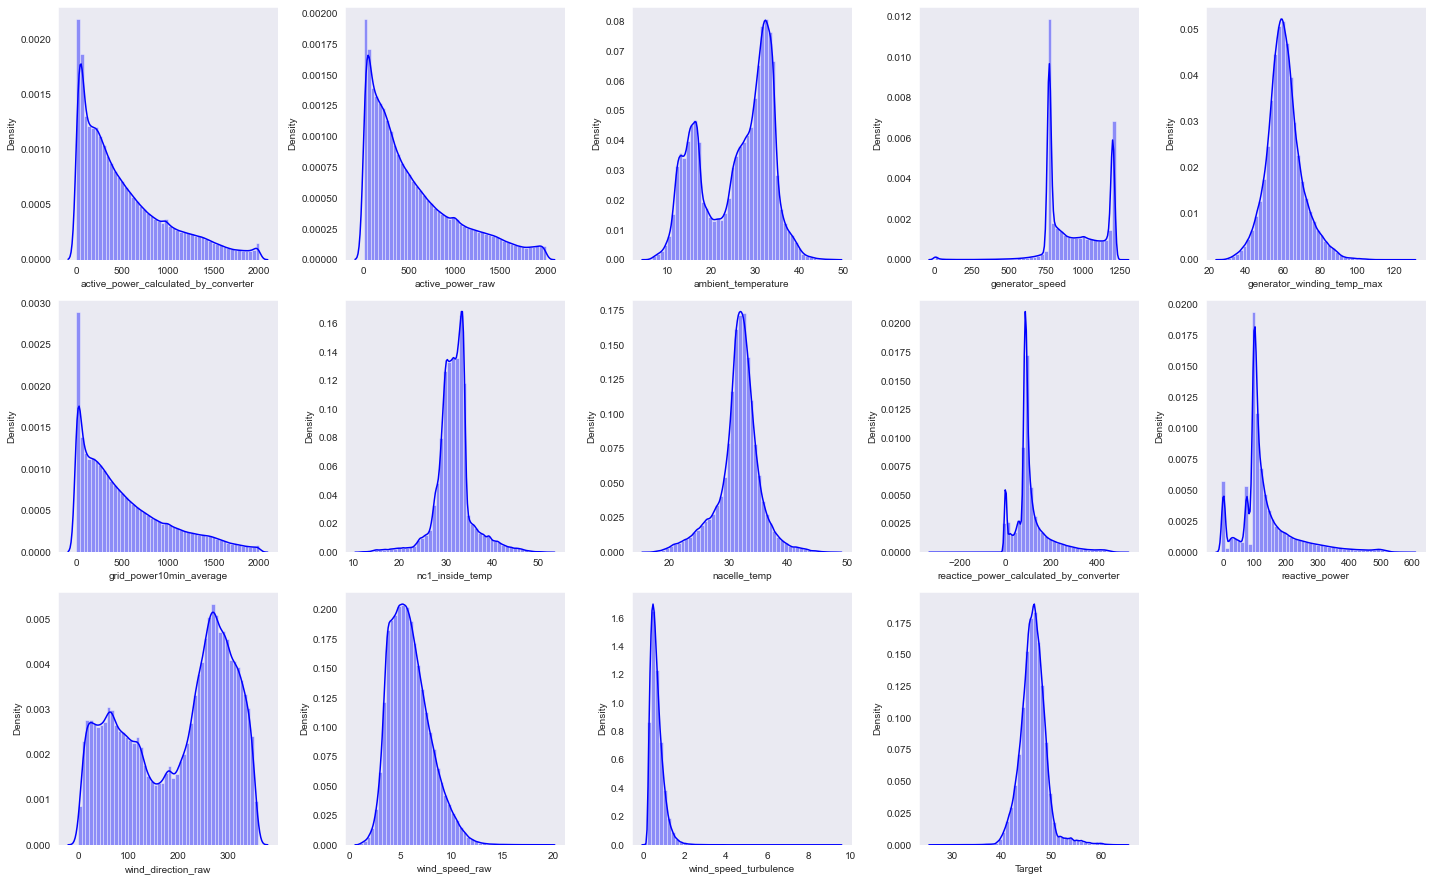

In [73]:
# Plotting the distributions of the numerical features
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

Some are normally distributed; and some left skewed. The target variable ('Target') is normally distributed. Let's apply a power transformer on the data and see how that affects the distributions.

In [112]:
# Applying normalization & transformation to see if it reduces the impact of outliers
from sklearn.preprocessing import PowerTransformer

# Init
pt = PowerTransformer()

cols = train.columns[train.columns != 'Target']
train[cols] = pt.fit_transform(train[cols])
train.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267,47.582787
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215,46.070328
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915,39.989236
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483,46.056587
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905,54.346095


In [113]:
train.skew(axis=0)

active_power_calculated_by_converter     -0.110339
active_power_raw                         -0.097555
ambient_temperature                      -0.232208
generator_speed                          -0.023327
generator_winding_temp_max                0.016822
grid_power10min_average                  -0.166983
nc1_inside_temp                           0.202477
nacelle_temp                              0.119152
reactice_power_calculated_by_converter   -1.465851
reactive_power                            0.100957
wind_direction_raw                       -0.406996
wind_speed_raw                           -0.001060
wind_speed_turbulence                     0.046962
Target                                    0.705359
dtype: float64

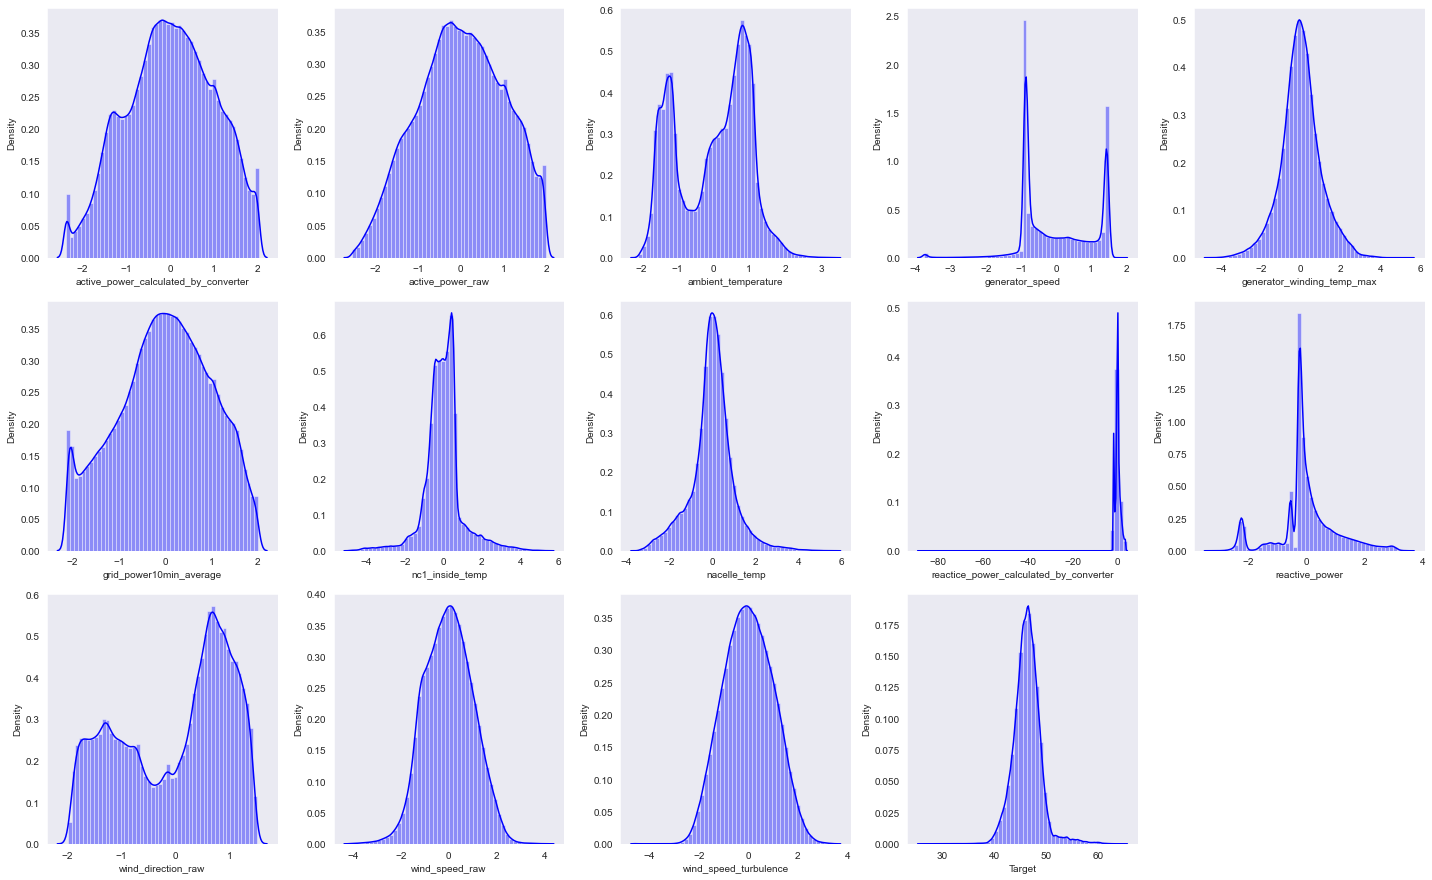

In [114]:
# Plotting the distributions of the numerical features after applying log transformation
plt.figure(figsize=(20,16))

for i, col in enumerate(list(train)):
    plt.subplot(4,5,i+1)
    sns.distplot(train[col], color='b', kde=True, label='data')
    plt.grid()
    plt.tight_layout()

The Power transformer has improved the distribution. There are some outliners for the " reactice_power_calculated_by_converter" feature; we will see how to treat that in later stages. But for now this transformation can be applied and taken forward.

In [115]:
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435
1,472.577255,478.373881,12.306687,965.077563,51.796728,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864276,189.731988,236.053320,261.672180,7.822326,0.561465


In [116]:
test = pd.DataFrame(pt.fit_transform(test), columns=test.columns)
test.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,-1.772346,-1.778495,2.048489,-2.497042,-0.305111,-1.009614,4.486108,4.576369,-1.851679,-2.224844,-0.389183,-2.254006,0.698795
1,0.220378,0.215853,-1.566007,0.144343,-0.922176,0.248735,-1.094694,-2.018279,-0.079325,0.003569,-1.373470,0.133691,-0.178899
2,0.168378,0.158694,0.390471,0.053440,0.025699,0.039673,1.971111,1.165867,-0.160583,-0.021594,0.255665,0.146219,-0.316702
3,-0.327380,-0.365622,0.115958,-0.688208,-0.480182,-0.569982,-0.588290,-0.204204,-0.174214,-0.164993,-0.143695,-0.716170,-0.633185
4,1.255409,1.263624,0.818413,1.446851,0.704211,1.169394,0.031213,-0.285226,1.048744,1.134835,0.601470,1.009043,-0.104702


**FEATURE SELECTION**

In [117]:
train.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'Target'],
      dtype='object')

In [118]:
feat_cols = ['active_power_calculated_by_converter', 'active_power_raw', 'ambient_temperature',
              'generator_speed', 'generator_winding_temp_max', 'grid_power10min_average', 'nc1_inside_temp',
              'nacelle_temp', 'reactice_power_calculated_by_converter', 'reactive_power', 'wind_direction_raw',
              'wind_speed_raw', 'wind_speed_turbulence']

X = train[feat_cols]
y = train['Target']

In [119]:
X.shape[1]

13

In [120]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence
0,0.804489,0.812812,0.754969,1.217683,0.577310,0.924106,0.023750,-0.099916,0.491302,0.492280,0.777760,0.682465,-0.181267
1,0.105511,0.091834,-1.508825,-0.049678,-0.067461,0.154954,0.162061,0.262363,-0.182065,-0.061024,0.949197,-0.090553,-0.532215
2,1.393659,1.403914,-1.131586,1.455545,0.108487,1.440377,-4.905537,-3.179904,1.480174,1.499626,-1.083126,1.115842,0.137915
3,-1.228872,-1.356495,0.294849,-0.865130,-2.296073,-1.659102,0.631422,0.235060,-0.516278,-0.557574,-1.060222,-0.938929,0.609483
4,0.451064,0.466452,0.730050,0.587518,0.418478,0.445702,0.157430,-0.110827,0.439360,0.439541,1.078729,0.359877,-1.226905


In [121]:
y.head()

0    47.582787
1    46.070328
2    39.989236
3    46.056587
4    54.346095
Name: Target, dtype: float64

**Correlation check for multi-collinearity**

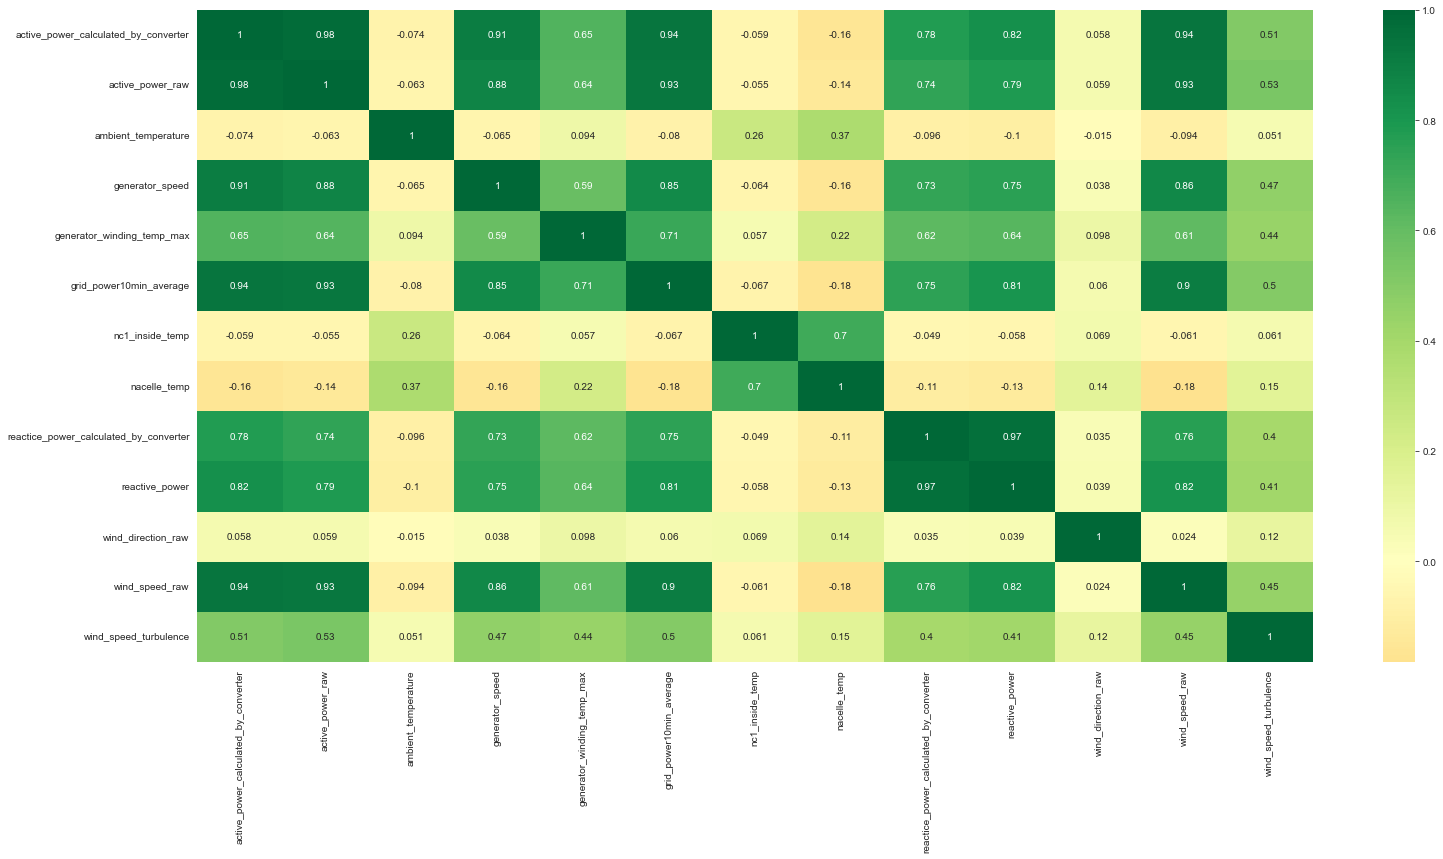

In [122]:
# Plotting a heatmap plot

from turtle import color
plt.figure(figsize=(25,12))
p = sns.heatmap(data=X.corr(method='pearson'), cmap='RdYlGn', annot=True, center=0)

**Correlation of Independent Variables**

Based on the coefficient values some of the independent variables are highly correlated to each other (value >=0.8). This means we may need to drop one of these to ensure we do not overfit the model. We will analyze further with some other methods (VIF, Feature Selection and Embedded methods) to come to an optimal set of features.

* active_power_calculated_by_converter & active_power_raw 
* active_power_calculated_by_converter & wind_speed_raw
* active_power_calculated_by_converter & grid_power10min_average
* active_power_raw & wind_speed_raw
* active_power_raw & grid_power10min_average
* generator_speed & active_power_calculated_by_converter  
* reactice_power_calculated_by_converter & reactive_power

**VIF Check**

In [123]:
# Import VIF library for multi-collinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calc_vif(dataframe):

    # calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = dataframe.columns
    vif["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif = vif.sort_values(ascending=False, by="VIF")
    return(vif)

calc_vif(X) 

,Variables,VIF
0,active_power_calculated_by_converter,38.181699
1,active_power_raw,26.281814
9,reactive_power,21.902869
8,reactice_power_calculated_by_converter,17.417872
5,grid_power10min_average,12.335362
11,wind_speed_raw,10.142883
3,generator_speed,5.853446
7,nacelle_temp,3.367055
4,generator_winding_temp_max,3.303477
6,nc1_inside_temp,2.237131


* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

I will remove one column at a time, starting with the highest VIF value, and see how it impacts the other VIF values.

In [124]:
X = X.drop(['active_power_calculated_by_converter', 'active_power_raw', 'reactive_power','reactice_power_calculated_by_converter'], axis=1)
calc_vif(X)

,Variables,VIF
3,grid_power10min_average,9.079282
7,wind_speed_raw,6.630188
1,generator_speed,4.340181
5,nacelle_temp,3.317795
2,generator_winding_temp_max,3.055848
4,nc1_inside_temp,2.220333
8,wind_speed_turbulence,1.508332
0,ambient_temperature,1.168021
6,wind_direction_raw,1.045255


In [125]:
X.columns

Index(['ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence'],
      dtype='object')

In [126]:
test.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence'],
      dtype='object')

In [127]:
test_df = test.copy()
test_df = test_df.drop(['active_power_calculated_by_converter', 'active_power_raw', 'reactive_power','reactice_power_calculated_by_converter'], axis=1)
test_df.columns

Index(['ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence'],
      dtype='object')

In [140]:
# Importing all necessary libraries

from math import sqrt
import xgboost as xgb
import lightgbm as lgb
import optuna

#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_regression
#from functools import partial
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold, cross_validate

**MODEL BUILDING**

In [129]:
# SPLIT TRAIN DATASET INTO TRAIN & VALIDATION TO TEST MODEL BEFORE PREDICTING ON TEST DATASET

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(818643, 9) (818643,) (90961, 9) (90961,)


LINEAR REGRESSION

In [130]:
# Fit a simple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)

lr_train_acc = (lr_model.score(X_train, y_train))*100
lr_val_acc = (lr_model.score(X_val, y_val))*100
mape_lr = mean_absolute_percentage_error(y_val, lr_pred)

print(f"Training accuracy: {lr_train_acc} %")
print(f"Validation accuracy: {lr_val_acc} %")
print(f"Linear Regression Mean Absolute Percent Error: {mape_lr}")

Training accuracy: 40.80144665569907 %
Validation accuracy: 41.05336703850274 %
Linear Regression Mean Absolute Percent Error: 0.030024294187167032


RANDOM FOREST REGRESSION

In [131]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)

rf_train_acc = (rf_model.score(X_train, y_train))*100
rf_val_acc = (rf_model.score(X_val, y_val))*100
mape_rf = mean_absolute_percentage_error(y_val, rf_pred)

print(f"Training accuracy: {rf_train_acc} %")
print(f"Validation accuracy: {rf_val_acc} %")
print(f"Random Forest Model Mean Absolute Percent Error: {mape_rf}")

Training accuracy: 96.85616616417003 %
Validation accuracy: 77.55776596678258 %
Random Forest Model Mean Absolute Percent Error: 0.016119734346333212


In [132]:
pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Score']).sort_values('Score', ascending=False)

,Score
ambient_temperature,0.269516
nacelle_temp,0.242900
generator_winding_temp_max,0.117041
nc1_inside_temp,0.114511
wind_direction_raw,0.090072
grid_power10min_average,0.070645
wind_speed_turbulence,0.041035
wind_speed_raw,0.028618
generator_speed,0.025662


CATBOOST REGRESSOR

In [133]:
from catboost import CatBoostRegressor, cv

cat_model = CatBoostRegressor(loss_function='MAPE')
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_val)

cat_train_acc = (cat_model.score(X_train, y_train))*100
cat_val_acc = (cat_model.score(X_val, y_val))*100
mape_cat = mean_absolute_percentage_error(y_val, cat_pred)

print(f"Training accuracy: {cat_train_acc} %")
print(f"Validation accuracy: {cat_val_acc} %")
print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

0:	learn: 0.0406822	total: 323ms	remaining: 5m 22s
1:	learn: 0.0403828	total: 507ms	remaining: 4m 12s
2:	learn: 0.0400971	total: 704ms	remaining: 3m 54s
3:	learn: 0.0398123	total: 899ms	remaining: 3m 43s
4:	learn: 0.0395280	total: 1.09s	remaining: 3m 37s
5:	learn: 0.0392684	total: 1.27s	remaining: 3m 30s
6:	learn: 0.0390098	total: 1.43s	remaining: 3m 23s
7:	learn: 0.0387623	total: 1.59s	remaining: 3m 16s
8:	learn: 0.0385115	total: 1.77s	remaining: 3m 14s
9:	learn: 0.0382644	total: 1.95s	remaining: 3m 13s
10:	learn: 0.0380156	total: 2.14s	remaining: 3m 12s
11:	learn: 0.0377772	total: 2.31s	remaining: 3m 10s
12:	learn: 0.0375567	total: 2.49s	remaining: 3m 9s
13:	learn: 0.0373297	total: 2.65s	remaining: 3m 6s
14:	learn: 0.0371155	total: 2.79s	remaining: 3m 2s
15:	learn: 0.0369008	total: 2.98s	remaining: 3m 3s
16:	learn: 0.0366755	total: 3.13s	remaining: 3m 1s
17:	learn: 0.0364756	total: 3.31s	remaining: 3m
18:	learn: 0.0362777	total: 3.47s	remaining: 2m 58s
19:	learn: 0.0360790	total: 3.6

**Cross-Validation on CatBoost**

In [134]:
#CATBOOST_PARAMS = {
#    'random_seed':47,
#    'learning_rate':0.4,
#    'iterations':1000,
#    'max_depth':12,
#    'early_stopping_rounds':10,
#    'min_data_in_leaf':12}

In [135]:
# from catboost import CatBoostRegressor
# cb_model = CatBoostRegressor(**CATBOOST_PARAMS)

# cb_model.fit(X_train, y_train)
# cb_pred = cb_model.predict(X_val)

# cb_train_acc = (cb_model.score(X_train, y_train))*100
# cb_val_acc = (cb_model.score(X_val, y_val))*100
# mape_cb = mean_absolute_percentage_error(y_val, cb_pred)

# print(f"Training accuracy: {cb_train_acc} %")
# print(f"Validation accuracy: {cb_val_acc} %")
# print(f"CatBoost Model Mean Absolute Percent Error: {mape_cb}")


In [136]:
print(cat_model.get_feature_importance(prettified=True))


                   Feature Id  Importances
0                nacelle_temp    27.624453
1         ambient_temperature    23.518542
2  generator_winding_temp_max    18.476639
3             nc1_inside_temp    16.659043
4     grid_power10min_average     7.197500
5          wind_direction_raw     5.187113
6       wind_speed_turbulence     0.728082
7             generator_speed     0.313086
8              wind_speed_raw     0.295542


In [137]:
# from sklearn.model_selection import RandomizedSearchCV
# cat_model = CatBoostRegressor(loss_function='MAPE')

# grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
#           'max_depth':[0,2,4,6,8,10,12,14,16],
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200],
#           'min_data_in_leaf':[1,2,3,4,5,6,7,8,9,10]}

# randomized_search_result = cat_model.randomized_search(grid,
#             X,
#             y,
#             cv=5,
#             partition_random_seed=42,
#             search_by_train_test_split=True,
#             refit=True,
#             shuffle=True,
#             stratified=None,
#             train_size=0.8,
#             verbose=0,
#             plot=False)

# cat_model.fit(X_train, y_train)
# cat_pred = cat_model.predict(X_val)

# cat_train_acc = (cat_model.score(X_train, y_train))*100
# cat_val_acc = (cat_model.score(X_val, y_val))*100
# mape_cat = mean_absolute_percentage_error(y_val, cat_pred)

# print(f"Training accuracy: {cat_train_acc} %")
# print(f"Validation accuracy: {cat_val_acc} %")
# print(f"CatBoost Model Mean Absolute Percent Error: {mape_cat}")

In [139]:
print(cat_model.get_best_score())

{'learn': {'MAPE': 0.023959609602862832}}


In [144]:
def objective(trial):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["RMSE", "MAE", "MAPE"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),  
    }
    # Conditional Hyper-Parameters
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cb_reg = CatBoostRegressor(**param)
    cb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0, early_stopping_rounds=100)
    cb_pred = cb_reg.predict(X_val)
    mape_score = mean_absolute_percentage_error(y_val, cb_pred)
    return mape_score

In [147]:
from optuna.samplers import TPESampler

#df = pd.read_csv('diamonds.csv').drop(['index'],axis=1)
#X = df.drop(['price'],axis=1)
#y = df['price']
#categorical_features_indices = np.where(X.dtypes != np.float)[0]

study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

optuna.visualization.plot_param_importances(study)

[I 2022-09-08 17:32:55,357] A new study created in memory with name: no-name-7cd265dd-38a9-48c8-b283-89d7da3c3eb8
[I 2022-09-08 17:33:16,783] Trial 0 finished with value: 0.027261383015881897 and parameters: {'loss_function': 'RMSE', 'learning_rate': 0.09156840173113963, 'l2_leaf_reg': 0.13578461184482418, 'colsample_bylevel': 0.08342348769959038, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 13, 'one_hot_max_size': 14, 'bagging_temperature': 5.410133926510752}. Best is trial 0 with value: 0.027261383015881897.
[I 2022-09-08 17:34:09,314] Trial 1 finished with value: 0.034902986504257646 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.006921090075391283, 'l2_leaf_reg': 0.03164275278640322, 'colsample_bylevel': 0.05296716663487475, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'min_data_in_leaf': 18, 'one_hot_max_size': 11}. Best is trial 1 with value: 0.034902986504257646.
[I 2022-09-08 17:34:19,177] Trial 2 fin

Number of completed trials: 10
Best trial:
	Best Score: 0.04110652959597213
	Best Params: 
    loss_function: RMSE
    learning_rate: 0.00019543651550159053
    l2_leaf_reg: 0.018257031210398362
    colsample_bylevel: 0.016341393917703013
    depth: 6
    boosting_type: Plain
    bootstrap_type: Bernoulli
    min_data_in_leaf: 8
    one_hot_max_size: 19
    subsample: 0.6835607912548489


In [142]:
# from sklearn.metrics import make_scorer
# gr_reg = GradientBoostingRegressor()

# kf = KFold(n_splits=5, shuffle=True, random_state=100)
# scores = cross_validate(
#     gr_reg, X, y, cv=kf, scoring="neg_mean_absolute_percentage_error", n_jobs=-1)

# base_mape = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
# print(f"Base MAPE: {base_mape}")


Base MAPE: make_scorer(mean_absolute_percentage_error, greater_is_better=False)


**MODEL EVALUATION TABLE**

In [78]:
models = pd.DataFrame({
    'Model': ['Linear Regression','XGBoost Regressor', 
             'Random Forest Regressor', 'CatBoost Regressor'],
    'Training Accuracy %' : [lr_train_acc, xg_train_acc, rf_train_acc, cat_train_acc],
    'Validation Accuracy %' : [lr_val_acc, xg_val_acc, rf_val_acc, cat_val_acc],
    'MAPE Score' : [mape_lr, mape_xg, mape_rf, mape_cat]
})

models.sort_values(by = ['MAPE Score'],ascending = True)

,Model,Training Accuracy %,Validation Accuracy %,MAPE Score
3,Random Forest Regressor,96.998899,78.496042,0.015786
4,CatBoost Regressor,80.832951,67.381752,0.019251
1,XGBoost Regressor,70.877773,68.583001,0.021315
0,Linear Regression,41.124234,41.395850,0.029890
2,AdaBoost Regressor,16.117634,16.154187,0.037768


It looks like the Random Forest Regressor has performed well with the lowest MAPE value amongst all and with the highest model score overall. We will now run the same models with the features derived from RF and CatBoost Feature importance methods and check if there is a difference in the above comparison.

**PREDICTION**

As we can see from the above the RF Regressor on the 10 features as derived from the initial RF regressor model provided a slightly better model in terms of MAPE value. We will consider the above RF Model to predict on the test set and generate the submission file.

In [ ]:
test['Target'] = rf_model.predict(X_test)
test['Target'].to_csv('./ReNew_Participants_Data/my_submission.csv', index=False)

In [ ]:
test['Target'] = cat_model.predict(X_test)
test['Target'].to_csv('my_submission.csv', index=False)